### Importando as Bibliotecas que serão utilizadas

In [ ]:
import pandas as pd # importa o pandas
import numpy as np # importa o numpy
import sklearn as sk # importa o sklearn
import seaborn as sns # importa o seaborn
import matplotlib.pyplot as plt # importa o matplotlib

### Importando os Dados

Aqui importo os dados dos arquivos disponíveis no Kaggle para serem utilizados no meu modelo preditivo.

In [ ]:
test = pd.read_csv('test.csv') # importa o arquivo de teste
train = pd.read_csv('train.csv') # importa o arquivo de treino
sample = pd.read_csv('sample_submission.csv') # importa o arquivo de submissão

train.head() # mostra as primeiras linhas do arquivo de treino para visualização

,id,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,is_CA,...,is_consulting,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,labels
0,719,10.42,13.09,8.98,12.72,4,3,4087500,3,1,...,0,0,1,1,0,0,0,0,1.0,0
1,429,3.79,3.79,NaN,NaN,21,1,45000000,0,0,...,0,0,0,0,0,1,0,0,1.0,1
2,178,0.71,2.28,1.95,2.28,5,2,5200000,2,1,...,0,1,1,0,1,0,0,0,1.0,0
3,197,3.00,5.00,9.62,10.39,16,2,14500000,2,0,...,0,0,0,1,0,1,0,0,2.0,1
4,444,0.66,5.88,6.21,8.61,29,5,70000000,4,1,...,0,0,0,0,1,1,1,1,2.8,1


### Limpeza e Tratamento de Valores Nulos

Aqui faço a verificação dos valores nulos para ver em quais colunas há valores faltantes e a quantidade em cada coluna.

In [ ]:
train.isnull().sum() # verifica aonde tem valores nulos

id                            0
age_first_funding_year       35
age_last_funding_year         9
age_first_milestone_year    138
age_last_milestone_year     111
relationships                 0
funding_rounds                0
funding_total_usd             0
milestones                    0
is_CA                         0
is_NY                         0
is_MA                         0
is_TX                         0
is_otherstate                 0
category_code                 0
is_software                   0
is_web                        0
is_mobile                     0
is_enterprise                 0
is_advertising                0
is_gamesvideo                 0
is_ecommerce                  0
is_biotech                    0
is_consulting                 0
is_othercategory              0
has_VC                        0
has_angel                     0
has_roundA                    0
has_roundB                    0
has_roundC                    0
has_roundD                    0
avg_part

Aqui trato esses valores nulos, então para todas as colunas que a verificação acima mostrou que há valores nulos, eu substituo esses valores nulos por zero. Ao final, faço uma nova verificação para garantir que não há mais valores nulos no DataFrame.

In [ ]:
age_cols = [ # lista com as colunas que tem valores nulos
    'age_first_funding_year',
    'age_last_funding_year',
    'age_first_milestone_year',
    'age_last_milestone_year'
]

for col in age_cols: # para cada colunas, substitui os valores nulos por 0 tanto no arquivo de treino quanto no de teste
    train[col] = train[col].fillna(0)
    test[col] = test[col].fillna(0)

train.isnull().sum() # verifica se ainda tem valores nulos no arquivo de treino
test.isnull().sum() # verifica se ainda tem valores nulos no arquivo de teste

id                          0
age_first_funding_year      0
age_last_funding_year       0
age_first_milestone_year    0
age_last_milestone_year     0
relationships               0
funding_rounds              0
funding_total_usd           0
milestones                  0
is_CA                       0
is_NY                       0
is_MA                       0
is_TX                       0
is_otherstate               0
category_code               0
is_software                 0
is_web                      0
is_mobile                   0
is_enterprise               0
is_advertising              0
is_gamesvideo               0
is_ecommerce                0
is_biotech                  0
is_consulting               0
is_othercategory            0
has_VC                      0
has_angel                   0
has_roundA                  0
has_roundB                  0
has_roundC                  0
has_roundD                  0
avg_participants            0
dtype: int64

### Codificação de Variáveis Categóricas

Aqui verifico quais são as possiveis classificações que a coluna 'category_code' possui para poder realizar o OneHotEncoding

In [ ]:
train['category_code'].unique() # verificação de todas as possibilidades da categoria

array(['enterprise', 'advertising', 'photo_video', 'web', 'software',
       'games_video', 'mobile', 'sports', 'fashion', 'semiconductor',
       'security', 'biotech', 'hardware', 'public_relations', 'ecommerce',
       'other', 'social', 'cleantech', 'manufacturing', 'automotive',
       'network_hosting', 'messaging', 'music', 'travel', 'consulting',
       'search', 'finance', 'medical', 'analytics', 'real_estate',
       'education', 'health', 'news', 'transportation'], dtype=object)

Aqui faço o OneHotEncoding na coluna 'category_code', ou seja, crio uma nova coluna para cada classificação possível presente na coluna 'category_code', atribuo 1 ou 0 para cada linha, o que significa que a linha pertence ou não àquela classifcação. Após essa codificação, removo a coluna 'category_code', pois agora ela és codificada em várias outras colunas.

In [ ]:
from sklearn.preprocessing import OneHotEncoder # importa o OneHotEncoder

ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False) # cria o objeto OneHotEncoder
ohe.fit(train[['category_code']]) # treina o objeto OneHotEncoder com a coluna category_code

train_cat_encoded = ohe.transform(train[['category_code']]) # transforma a coluna category_code em um objeto com as colunas codificadas para o arquivo de treino
test_cat_encoded = ohe.transform(test[['category_code']]) # transforma a coluna category_code em um objeto com as colunas codificadas para o arquivo de teste

cols_encoded = ohe.get_feature_names_out(['category_code']) # pega o nome das colunas codificadas
train_cat_df = pd.DataFrame(train_cat_encoded, columns=cols_encoded, index=train.index) # transforma o objeto em um novo dataframe para o arquivo de treino
test_cat_df = pd.DataFrame(test_cat_encoded, columns=cols_encoded, index=test.index) # transforma o objeto em um novo dataframe para o arquivo de teste

train = pd.concat([train.drop(columns=['category_code']), train_cat_df], axis=1) # concatena o dataframe com as colunas codificadas e remove a coluna category_code do arquivo de treino
test = pd.concat([test.drop(columns=['category_code']), test_cat_df], axis=1) # concatena o dataframe com as colunas codificadas e remove a coluna category_code do arquivo de teste


### Feature Engineering

Aqui faço a criação de novas features que podem ser relevantes para o modelo preditivo, como a soma do total de dinheiro arrecadado em todas as rodadas de financiamento (funding_rounds) e a média de dinheiro arrecadado por rodada.

In [ ]:
# cria uma nova coluna com o valor do funding por round
train['funding_per_round'] = train['funding_total_usd'] / (train['funding_rounds'] + 1)  
test['funding_per_round'] = test['funding_total_usd'] / (test['funding_rounds'] + 1)

# cria uma nova coluna com o logaritmo do funding total
train['log_funding_total'] = np.log1p(train['funding_total_usd']) 
test['log_funding_total'] = np.log1p(test['funding_total_usd'])

# cria uma nova coluna com o logaritmo das relações
train['log_relationships'] = np.log1p(train['relationships']) 
test['log_relationships'] = np.log1p(test['relationships'])

# cria uma nova coluna com 1 se tiver funding e 0 se não tiver
train['has_funding'] = (train['funding_rounds'] > 0).astype(int) 
test['has_funding'] = (test['funding_rounds'] > 0).astype(int)

# cria uma nova coluna com 1 se tiver milestone e 0 se não tiver
train['has_milestone'] = (train['milestones'] > 0).astype(int) 
test['has_milestone'] = (test['milestones'] > 0).astype(int)

# cria uma nova coluna com a razão entre o número de milestones e a idade do último milestone
train['milestone_ratio'] = train['milestones'] / (train['age_last_milestone_year'] + 1) 
test['milestone_ratio'] = test['milestones'] / (test['age_last_milestone_year'] + 1)

### Exploração e Visualização dos Dados

labels
1    0.647059
0    0.352941
Name: proportion, dtype: float64


<Axes: title={'center': 'Distribuição das Classes'}, xlabel='labels'>

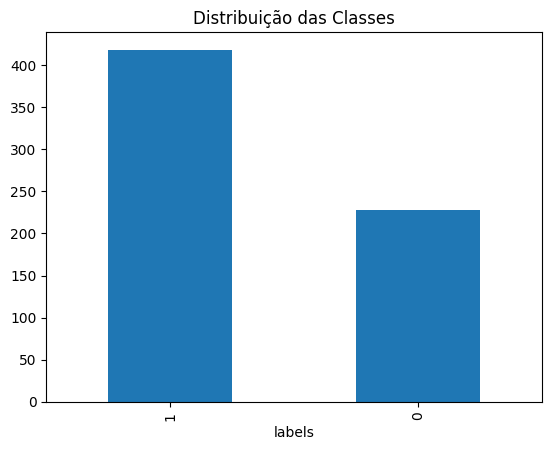

In [114]:
print(train['labels'].value_counts(normalize=True))
train['labels'].value_counts().plot(kind='bar', title='Distribuição das Classes')

In [115]:
train.describe()

,id,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,is_CA,...,category_code_sports,category_code_transportation,category_code_travel,category_code_web,funding_per_round,log_funding_total,log_relationships,has_funding,has_milestone,milestone_ratio
count,646.000000,646.000000,646.000000,646.000000,646.000000,646.000000,646.000000,6.460000e+02,646.000000,646.000000,...,646.000000,646.000000,646.000000,646.000000,6.460000e+02,646.000000,646.000000,646.0,646.000000,646.000000
mean,461.577399,2.214845,3.981471,2.636455,4.095093,7.948916,2.351393,2.949633e+07,1.913313,0.546440,...,0.001548,0.003096,0.006192,0.150155,7.297385e+06,15.783566,1.902149,1.0,0.840557,0.411958
std,264.859464,2.458298,2.968292,2.889983,3.468893,7.397602,1.357856,2.261999e+08,1.337095,0.498224,...,0.039344,0.055598,0.078506,0.357500,4.552711e+07,1.866480,0.778078,0.0,0.366372,0.326207
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.100000e+04,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,3.666667e+03,9.305741,0.000000,1.0,0.000000,0.000000
25%,233.250000,0.550000,1.755000,0.000000,1.000000,3.000000,1.000000,3.000000e+06,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.058333e+06,14.914123,1.386294,1.0,1.000000,0.166667
50%,459.500000,1.435000,3.560000,2.000000,3.970000,6.000000,2.000000,1.020000e+07,2.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,3.372917e+06,16.137706,1.945910,1.0,1.000000,0.363416
75%,692.500000,3.390000,5.560000,4.000000,6.187500,10.000000,3.000000,2.587500e+07,3.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,6.825000e+06,17.068753,2.397895,1.0,1.000000,0.599701
max,923.000000,21.900000,21.900000,24.680000,24.680000,63.000000,8.000000,5.700000e+09,6.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.140000e+09,22.463732,4.158883,1.0,1.000000,2.000000


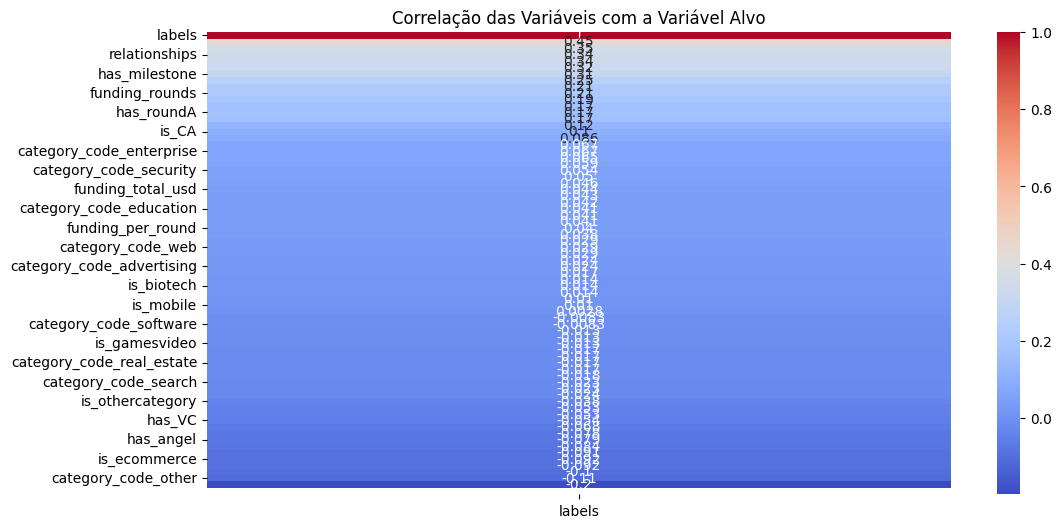

In [116]:
corr = train.corr(numeric_only=True)
plt.figure(figsize=(12,6))
sns.heatmap(corr[['labels']].sort_values(by='labels', ascending=False), annot=True, cmap='coolwarm')
plt.title('Correlação das Variáveis com a Variável Alvo')
plt.show()

### Formulação de Hipóteses

- Startups com mais rodadas de funding têm mais chances de sucesso

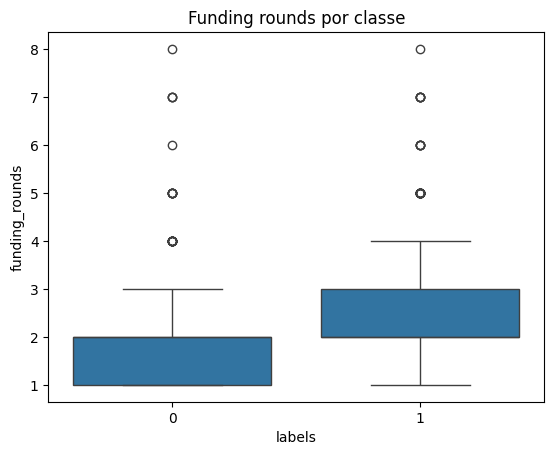

In [117]:
sns.boxplot(x='labels', y='funding_rounds', data=train)
plt.title('Funding rounds por classe')
plt.show()

- Startups com mais milestones registrados tendem a ter mais sucesso

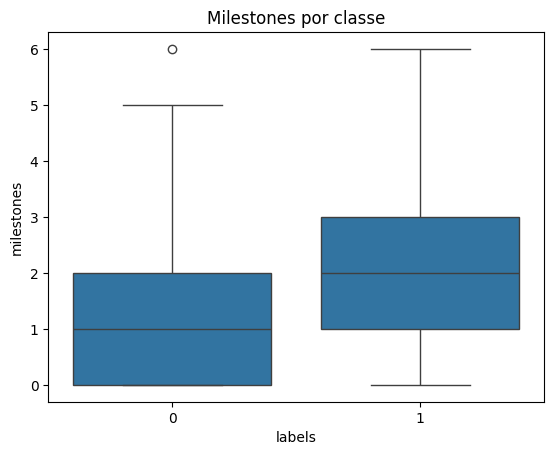

In [118]:
sns.boxplot(x='labels', y='milestones', data=train)
plt.title('Milestones por classe')
plt.show()

- Estar no estado da Califórnia aumenta as chances de sucesso

is_CA
0    0.593857
1    0.691218
Name: labels, dtype: float64


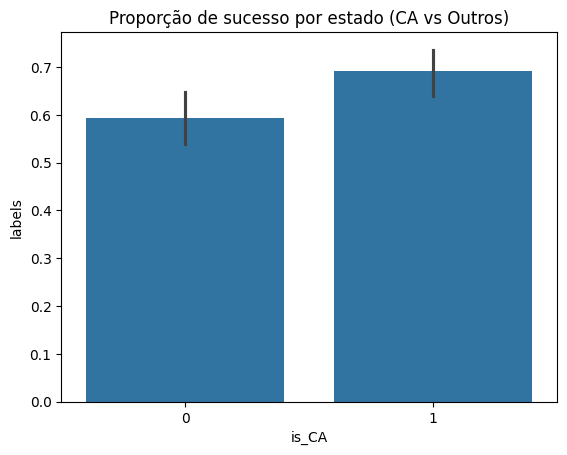

In [119]:
print(train.groupby('is_CA')['labels'].mean())

sns.barplot(x='is_CA', y='labels', data=train)
plt.title('Proporção de sucesso por estado (CA vs Outros)')
plt.show()

### Seleção de Features

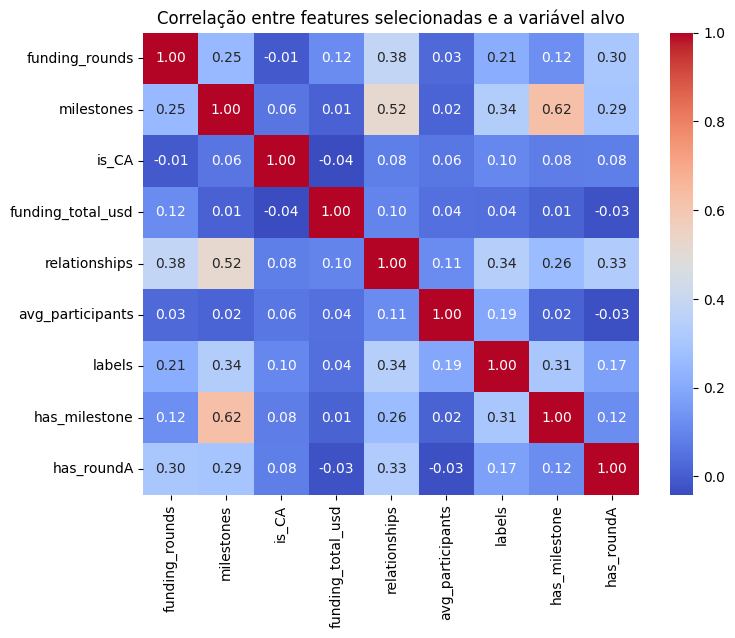

In [120]:
features_selecionadas = ['funding_rounds',
                        'milestones',
                        'is_CA',
                        'funding_total_usd',
                        'relationships',
                        'avg_participants',
                        'labels',
                        'has_milestone',
                        'has_roundA']

corr = train[features_selecionadas].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlação entre features selecionadas e a variável alvo')
plt.show()

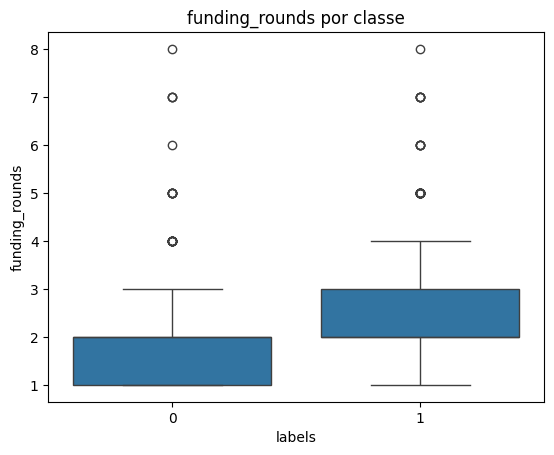

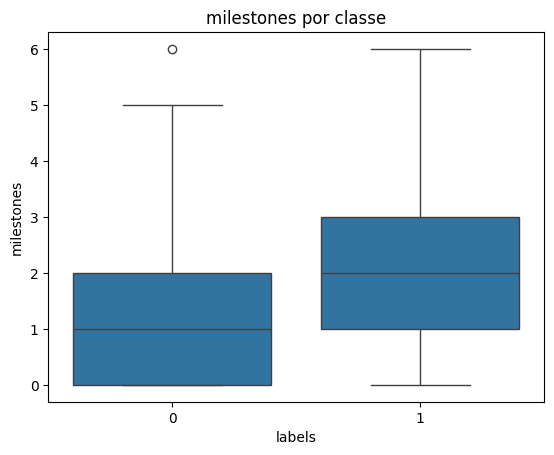

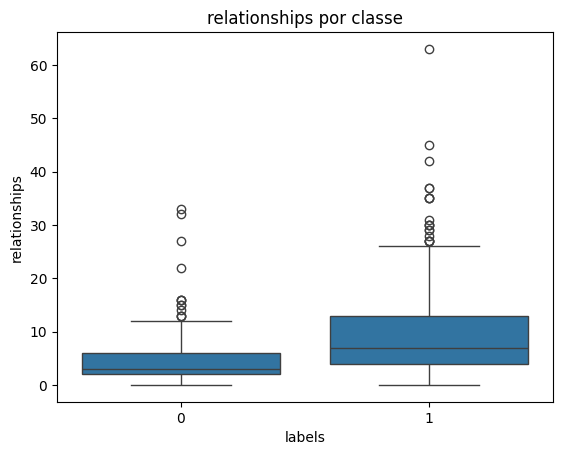

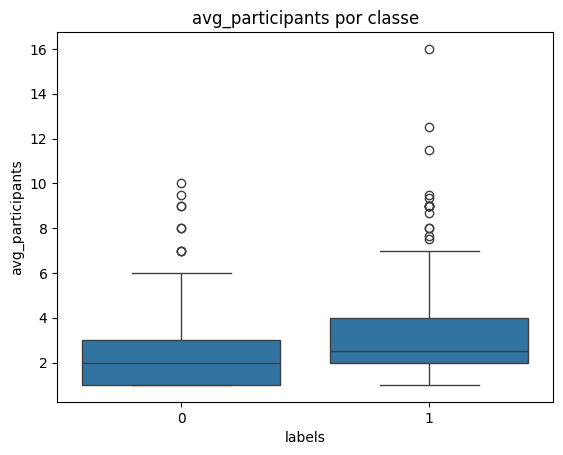

In [121]:
for col in ['funding_rounds', 'milestones', 'relationships', 'avg_participants']:
    sns.boxplot(x='labels', y=col, data=train)
    plt.title(f'{col} por classe')
    plt.show()

In [122]:
print(train.groupby('labels')[['funding_rounds',
                            'milestones',
                            'funding_total_usd',
                            'relationships',
                            'avg_participants',
                            'is_CA',
                            'has_milestone']].mean())

        funding_rounds  milestones  funding_total_usd  relationships  \
labels                                                                 
0             1.960526    1.307018       1.613087e+07       4.517544   
1             2.564593    2.244019       3.678658e+07       9.820574   

        avg_participants     is_CA  has_milestone  
labels                                             
0               2.350282  0.478070       0.688596  
1               3.120496  0.583732       0.923445  


### Construção e Avaliação do Modelo

In [123]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

features = ['funding_rounds',
                            'milestones',
                            'funding_total_usd',
                            'relationships',
                            'avg_participants',
                            'is_CA',
                            'has_milestone']

X = train[features]
y = train['labels']

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

modelos = {
    "Logistic Regression": LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "KNN": KNeighborsClassifier() 
}

for nome, modelo in modelos.items():
    scores = cross_val_score(modelo, X, y, cv=cv, scoring='accuracy')
    print(f"{nome}: {scores.mean():.2f} + {scores.std():.2f}")

Logistic Regression: 0.65 + 0.00
Decision Tree: 0.69 + 0.04
Random Forest: 0.77 + 0.03
Gradient Boosting: 0.79 + 0.02
KNN: 0.69 + 0.04


In [124]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

X = train.drop(columns=['labels', 'id'])
y = train['labels']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train, y_train)

y_pred = gb.predict(X_val)

print("Acurácia:", accuracy_score(y_val, y_pred))
print("\nRelatório de Classificação:\n", classification_report(y_val, y_pred, digits=2))
print("Matriz de Confusão:\n", confusion_matrix(y_val, y_pred))

Acurácia: 0.7769230769230769

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.74      0.57      0.64        46
           1       0.79      0.89      0.84        84

    accuracy                           0.78       130
   macro avg       0.77      0.73      0.74       130
weighted avg       0.77      0.78      0.77       130

Matriz de Confusão:
 [[26 20]
 [ 9 75]]


### Finetuning de Hiperparâmetros

In [125]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'subsample': [0.8, 1.0]
}

grid = GridSearchCV(
    estimator=gb,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

grid.fit(X, y)

print("Melhores parâmetros:", grid.best_params_)
print("Melhor acurácia média (CV):", grid.best_score_)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
Melhores parâmetros: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.8}
Melhor acurácia média (CV): 0.7987119856887299


In [126]:
best_gb = grid.best_estimator_

best_gb.fit(X, y)

test_pred = best_gb.predict(test.drop(columns=['id']))

sample = pd.read_csv("sample_submission.csv")

sample['labels'] = test_pred

sample.to_csv("submission.csv", index=False)
print("Arquivo salvo: submission.csv")

Arquivo salvo: submission.csv
